In [1]:
import h5py as h5
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy
fi = np.load("betas.npz")
xa = fi["xia"]
xb = fi["xib"]
ga = fi["ua"]
gb = fi["ub"]
ket = lambda a,b: np.kron(ga[:,a],gb[:,b]).reshape(len(xa),len(xb))
def plot(z):
    interpolate = True
    if interpolate: 
        N = 100
        interp = scipy.interpolate.RegularGridInterpolator((xa,xb), z, method="cubic")
        x = np.linspace(np.min(xa),np.max(xa),N)
        y = np.linspace(np.min(xb),np.max(xb),N)
        x,y = np.meshgrid(x,y)
        z = interp((x,y))
    else:
        x,y = np.meshgrid(xa,xb)
        z = z.T 

    cmap = cm.bwr
    nContours = 20
    ax = plt.gca()
    vMax = z.max()
    vMin = z.min()
    vRange = abs(vMax) + abs(vMin)
    l1 = int(nContours * abs(vMin) / vRange)
    l2 = int(nContours * abs(vMax) / vRange) + 1
    levels = np.hstack((np.linspace(vMin, 0, l1, endpoint=False), np.linspace(0, vMax, l2)[1:]))
    if vMax > 0:
        if vMin > 0:
            # or norm = DivergingNorm(vmin=z.min(), vcenter=0, vmax=z.max())
            norm = matplotlib.colors.TwoSlopeNorm(0.0, -vMax, vMax)
        else:
            norm = matplotlib.colors.TwoSlopeNorm(0.0, vMin, vMax)
    else:
        norm = matplotlib.colors.TwoSlopeNorm(0.0, vMin, -vMin) 
    cmap = plt.get_cmap(cmap, len(levels) - 1)

    cset1 = ax.contourf(x, y, z, levels, norm=norm, cmap=cmap)
    cset2 = ax.contour(x, y, z, cset1.levels, colors='k', alpha=0.8)
    for c in cset2.collections:
        c.set_linestyle('solid')
    if np.any(z > 0) and np.any(z < 0):
        cset3 = ax.contour(x, y, z, (0,), colors='darkred', linewidths=2, linestyles="dashed")
    out = cset1  # for colorbar
    plt.xlabel(r"$\beta_a$")
    plt.ylabel(r"$\beta_b$")
    plt.gcf().colorbar(out)
    plt.show()

/tmp/ipykernel_2320908/3523785379.py:47: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cset2.collections:


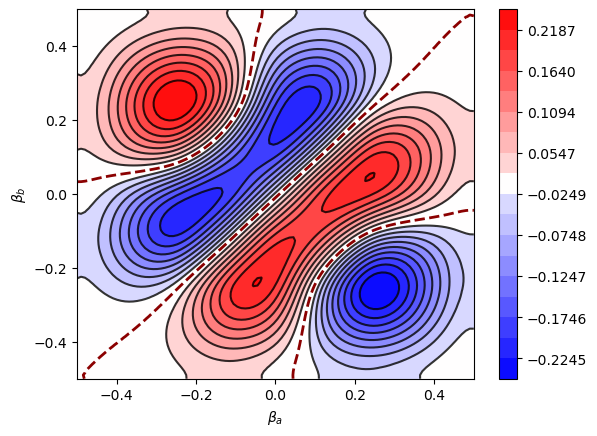

In [2]:
plot( 0.6 * (ket(2,1) - ket(1,2)) + 0.2 * (ket(1,0) - ket(0,1)) )

/tmp/ipykernel_2320908/3523785379.py:47: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cset2.collections:


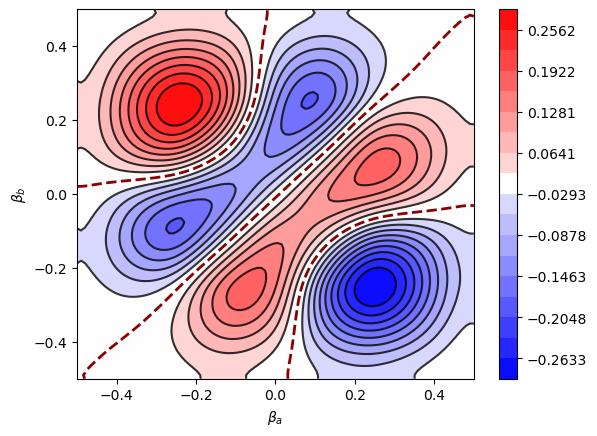

In [3]:
plot( 0.6 * (ket(2,1) - ket(1,2)) )